In [77]:
class Board:
    def __init__(self, size, player_turn = 'X'):
        self.size = size
        self.board = [[0 for _ in range(size)] for _ in range(size)]
        self.turn = player_turn

    def get_tile(self, row, col):
        return self.board[row][col]

    # Check if the game is won
    def get_winner(self):
        for i in range(3):
            if self.board[i][0] == self.board[i][1] == self.board[i][2] != 0:
                return self.board[i][0]
            if self.board[0][i] == self.board[1][i] == self.board[2][i] != 0:
                return self.board[0][i]
        if self.board[0][0] == self.board[1][1] == self.board[2][2] != 0:
            return self.board[0][0]
        if self.board[0][2] == self.board[1][1] == self.board[2][0] != 0:
            return self.board[0][2]
        return 0
    
    def is_full(self):
        for row in self.board:
            for cell in row:
                if cell == 0:
                    return False
        return True
    
    def game_is_over(self):
        return self.is_full() or self.get_winner() != 0
    
    def switch_turn(self):
        if self.turn == 'X':
            return 'O'
        else:
            return 'X'

    def make_move(self, row, col):
        if not self.game_is_over():
            if self.board[row][col] == 0:
                self.board[row][col] = self.turn
                self.turn = self.switch_turn()
                return True
            else: 
                return False
        else:
            print(self.print_board())
            raise ValueError("Game is over")
        
    def get_possible_moves(self):
        moves = []
        for row in range(self.size):
            for col in range(self.size):
                if self.board[row][col] == 0:
                    moves.append((row, col))
        return moves
    
    def print_board(self):
        for i in range(self.size):
            for j in range(self.size):
                print(self.board[i][j], end=' ')
            print()
        return ''
    
    def create_copy(self):
        new_board = Board(self.size)
        new_board.board = [row[:] for row in self.board]
        new_board.turn = self.turn
        return new_board
    
    def get_board(self):
        return self.board
    
    # Check if the opponent can win at possition i,j in the next move
    def move_block_opponent(self, i, j):
        if not self.board[i][j] == 0:
            raise ValueError("Invalid move")
        self.board[i][j] = 'X' if self.turn == 'O' else 'O'
        if self.get_winner() != 0:
            # Resetting the simulated move
            self.board[i][j] = 0
            return True
        else:
            self.board[i][j] = 0
            return False

In [78]:
# Test to see if Board class works as expected
tic_tac_toe = Board(3)
tic_tac_toe.print_board()
print()
tic_tac_toe.make_move(0, 0)
tic_tac_toe.print_board()
print()
tic_tac_toe.make_move(2, 1)
tic_tac_toe.print_board()
print()
tic_tac_toe.make_move(1, 0)
tic_tac_toe.print_board()
print()
tic_tac_toe.make_move(2, 2)
tic_tac_toe.print_board()
print()
tic_tac_toe.make_move(2, 0)
tic_tac_toe.print_board()
print()
print("The winner is", tic_tac_toe.get_winner())

0 0 0 
0 0 0 
0 0 0 

X 0 0 
0 0 0 
0 0 0 

X 0 0 
0 0 0 
0 O 0 

X 0 0 
X 0 0 
0 O 0 

X 0 0 
X 0 0 
0 O O 

X 0 0 
X 0 0 
X O O 

The winner is X


In [79]:
import math
class Node:
    def __init__(self, board):
        self.state = board
        self.children = []
        self.n = 0
        self.Q = 0
        self.parent = None
    
    def add_child(self, child):
        self.children.append(child)
    
    def get_children(self):
        return self.children
    
    def get_state(self):
        return self.state
    
    def set_parent(self, parent):
        self.parent = parent

    def get_parent(self):
        return self.parent
    
    def has_children(self):
        return len(self.children) > 0
    
    def get_total_N(self):
        if self.parent is None:
            return self.n  # Base case: if there's no parent, return the current node's N value
        else:
            return self.parent.get_total_N()  # Recursive case: add current node's N to parent's total
    
    def get_UCB(self):
        total_N = self.get_total_N()
        if self.n == 0:
            # Inf means it has not been visited yet
            return float('inf')
        if total_N < 0:
            print('the total N is', total_N, 'for node', self.state.get_board())
        return self.Q/self.n + 2 * (math.log(total_N)/ (self.n)) ** 0.5
    
    def is_fully_expanded(self):
        return len(self.children) == len(self.state.get_possible_moves())
    
    def is_terminal(self):
        return self.state.game_is_over()

In [80]:
import random
from math import inf
import numpy as np

class MachinePlayer:
    def __init__(self, player, max_depth):
        self.player = player
        self.max_depth = max_depth

    def get_move_made(self, board1, board2):
        for row in range(len(board1.get_board())):
            for col in range(len(board1.get_board())):
                if board1.get_tile(row, col) != board2.get_tile(row, col):
                    return (row, col)
        return None
    
    def get_best_move(self, board):
        return self.monte_carlo_tree_search(board.create_copy())
    
    def selection(self, node):
        if node.is_terminal():
            return node
        if not node.has_children():
            return node
                
        children = node.get_children()
        # Recursively call selection on the child with max UCB
        max_ucb_child = max(children, key=lambda n: n.get_UCB())
        return self.selection(max_ucb_child)


    def get_best_child(self, node):
        children = node.get_children()
      #  print('children', children)
        best_child = None
        best_score = -inf
        for child in children:
            if child.get_UCB() >= best_score: #and child.get_state().game_is_over() == False:
                best_child = child
                best_score = child.get_UCB()
        return best_child
    
    def expansion(self, node):
        if node.is_terminal():
            return node
        board = node.state.create_copy()
        possible_moves = board.get_possible_moves()
        for move in possible_moves:
            new_board = board.create_copy()
            new_board.make_move(move[0], move[1])
            new_node = Node(new_board)
            new_node.set_parent(node)
            node.add_child(new_node)
        
        #pick a random child
        if len(node.get_children()) > 0:
            random_child = random.choice(node.get_children())
            return random_child
        return node
    
    def simulation(self, node):
        if len(node.get_children()) == 0:
            return node.get_state().get_winner()
        else:
            to_sim_from = node.get_state().create_copy()
            
            while not to_sim_from.game_is_over():
                player = to_sim_from.turn
                possible_moves = to_sim_from.get_possible_moves()
                has_made_move = False
                
                for possible_move in possible_moves:
                    block_move = None
                    board_copy = to_sim_from.create_copy()
                    if board_copy.move_block_opponent(possible_move[0], possible_move[1]):
                        block_move = possible_move

                    board_copy.make_move(possible_move[0], possible_move[1])
                    if board_copy.get_winner() == player:
                        to_sim_from.make_move(possible_move[0], possible_move[1])
                        return to_sim_from.get_winner()       

                if block_move is not None:
                    to_sim_from.make_move(block_move[0], block_move[1])
                    has_made_move = True
                    
                if not has_made_move:
                    move = random.choice(possible_moves)
                    to_sim_from.make_move(move[0], move[1])

        return to_sim_from.get_winner()
    
    def get_other_player(self):
        if self.player == 'X':
            return 'O'
        else:
            return 'X'
            
    def backpropagate(self, node, result):
        current_node = node
        while current_node is not None:
            current_node.n += 1
            if result == self.player:
                current_node.Q += 1
            elif result == 0:
                current_node.Q += 0
            else:
                current_node.Q -= 1
            current_node = current_node.parent

    def immediate_win_or_block(self, node):
        possible_moves = node.get_state().get_possible_moves()
        blocking_move = None

        for move in possible_moves:
            board_copy = node.get_state().create_copy()
            if board_copy.move_block_opponent(move[0], move[1]):
                blocking_move = move

            board_copy.make_move(move[0], move[1])
            if board_copy.get_winner() == self.player:
                return move
            
        return blocking_move
    
    def monte_carlo_tree_search(self, board):
        root = Node(board)

        if self.immediate_win_or_block(root) is not None:
            return self.immediate_win_or_block(root)
        
        for i in range(self.max_depth):
            leaf = self.selection(root)
            leaf = self.expansion(leaf)
            simulation_result = self.simulation(leaf)
            self.backpropagate(leaf, simulation_result)

        return self.get_move_made(self.get_best_child(root).get_state(),root.get_state())

In [81]:
class TicTacToe:
    def __init__(self, size, human_player = 'X', machine_player = 'O'):
        self.size = size
        self.board = Board(size)
        self.human = human_player
        self.machine = machine_player
        self.machine_player = MachinePlayer(self.machine, 80)
    
    def play_game(self):
        print("Welcome to Tic Tac Toe")
        print("If you ever feel like giving up, just type quit and the game will end")
        print(self.board.print_board())
        while not self.board.game_is_over():
            if self.board.turn == self.human:
                success = self.human_move()
                if not success:
                    print("You have quit the game")
                    return
            else:
                self.machine_move()
        print("Game over")
        if self.board.get_winner() == 0:
            print("It's a draw")
        elif self.board.get_winner() == self.human:
            print("You won against the machine! Congrats ", self.board.get_winner())
        else:
            print("Machine takeover! Congrats ", self.board.get_winner())

    def human_move(self):
        chosen_positions = input("Enter the position i,j you want to play in, separated by a comma (enter quit if you want to stop playing): ")
        if chosen_positions == 'quit':
            return False
        row, col = map(int, chosen_positions.split(','))
        print("Your move", row, col)
        if self.board.make_move(row, col):
            print(self.board.print_board())
        else:
            print("Invalid move, try again")
            self.human_move()
        return True
    
    def machine_move(self):
        move = self.machine_player.get_best_move(self.board)
        print("Machine move: ", move)
        self.board.make_move(move[0], move[1])
        print(self.board.print_board())
        

In [82]:
#game = TicTacToe(3)
#game.play_game()

In [83]:
# Test machine player by playing against a random choice of moves
machine_winns = 0
random_wins = 0
draw=0
total_reps = 1000
for i in range(0, total_reps):
    machine = MachinePlayer('X', 80)
    board = Board(3)
    while not board.game_is_over():
        if board.turn == 'X':
            move = machine.get_best_move(board)
            print("Machine move: ", move)
            board.make_move(move[0], move[1])
            print(board.print_board())
        else:
            moves = board.get_possible_moves()
            move = random.choice(moves)
            print("Random move: ", move)
            board.make_move(move[0], move[1])
            print(board.print_board())
    if board.get_winner() == 'X':
        machine_winns += 1
    elif board.get_winner() == 'O':
        random_wins += 1
    else:
        draw +=1
print("Machine wins", machine_winns)
print("Random wins", random_wins)
print("Draws", draw)

Machine move:  (2, 2)
0 0 0 
0 0 0 
0 0 X 

Random move:  (2, 0)
0 0 0 
0 0 0 
O 0 X 

Machine move:  (1, 2)
0 0 0 
0 0 X 
O 0 X 

Random move:  (2, 1)
0 0 0 
0 0 X 
O O X 

Machine move:  (0, 2)
0 0 X 
0 0 X 
O O X 

Machine move:  (2, 2)
0 0 0 
0 0 0 
0 0 X 

Random move:  (1, 1)
0 0 0 
0 O 0 
0 0 X 

Machine move:  (1, 2)
0 0 0 
0 O X 
0 0 X 

Random move:  (1, 0)
0 0 0 
O O X 
0 0 X 

Machine move:  (0, 2)
0 0 X 
O O X 
0 0 X 

Machine move:  (2, 2)
0 0 0 
0 0 0 
0 0 X 

Random move:  (1, 2)
0 0 0 
0 0 O 
0 0 X 

Machine move:  (2, 0)
0 0 0 
0 0 O 
X 0 X 

Random move:  (1, 0)
0 0 0 
O 0 O 
X 0 X 

Machine move:  (2, 1)
0 0 0 
O 0 O 
X X X 

Machine move:  (2, 2)
0 0 0 
0 0 0 
0 0 X 

Random move:  (0, 1)
0 O 0 
0 0 0 
0 0 X 

Machine move:  (0, 2)
0 O X 
0 0 0 
0 0 X 

Random move:  (1, 0)
0 O X 
O 0 0 
0 0 X 

Machine move:  (1, 2)
0 O X 
O 0 X 
0 0 X 

Machine move:  (2, 2)
0 0 0 
0 0 0 
0 0 X 

Random move:  (1, 1)
0 0 0 
0 O 0 
0 0 X 

Machine move:  (2, 1)
0 0 0 
0 O 0 
0 X X

In [84]:
# Test machine player by playing against a random choice of moves (Machine is second to play)
machine_winns = 0
random_wins = 0
draw=0
total_reps = 1000
for i in range(0, total_reps):
    machine = MachinePlayer('X', 80)
    board = Board(3, player_turn='O')
    while not board.game_is_over():
        if board.turn == 'X':
            move = machine.get_best_move(board)
            print("Machine move: ", move)
            board.make_move(move[0], move[1])
            print(board.print_board())
        else:
            moves = board.get_possible_moves()
            move = random.choice(moves)
            print("Random move: ", move)
            board.make_move(move[0], move[1])
            print(board.print_board())
    if board.get_winner() == 'X':
        machine_winns += 1
    elif board.get_winner() == 'O':
        random_wins += 1
    else:
        draw +=1
print("Machine wins", machine_winns)
print("Random wins", random_wins)
print("Draws", draw)

Random move:  (2, 0)
0 0 0 
0 0 0 
O 0 0 

Machine move:  (1, 2)
0 0 0 
0 0 X 
O 0 0 

Random move:  (1, 1)
0 0 0 
0 O X 
O 0 0 

Machine move:  (0, 2)
0 0 X 
0 O X 
O 0 0 

Random move:  (1, 0)
0 0 X 
O O X 
O 0 0 

Machine move:  (2, 2)
0 0 X 
O O X 
O 0 X 

Random move:  (0, 2)
0 0 O 
0 0 0 
0 0 0 

Machine move:  (2, 2)
0 0 O 
0 0 0 
0 0 X 

Random move:  (1, 1)
0 0 O 
0 O 0 
0 0 X 

Machine move:  (2, 0)
0 0 O 
0 O 0 
X 0 X 

Random move:  (1, 2)
0 0 O 
0 O O 
X 0 X 

Machine move:  (2, 1)
0 0 O 
0 O O 
X X X 

Random move:  (1, 0)
0 0 0 
O 0 0 
0 0 0 

Machine move:  (2, 1)
0 0 0 
O 0 0 
0 X 0 

Random move:  (2, 2)
0 0 0 
O 0 0 
0 X O 

Machine move:  (0, 1)
0 X 0 
O 0 0 
0 X O 

Random move:  (0, 0)
O X 0 
O 0 0 
0 X O 

Machine move:  (1, 1)
O X 0 
O X 0 
0 X O 

Random move:  (1, 1)
0 0 0 
0 O 0 
0 0 0 

Machine move:  (2, 2)
0 0 0 
0 O 0 
0 0 X 

Random move:  (1, 0)
0 0 0 
O O 0 
0 0 X 

Machine move:  (1, 2)
0 0 0 
O O X 
0 0 X 

Random move:  (2, 1)
0 0 0 
O O X 
0 O X 



In [85]:
# Machine vs a strategy that only blocks the machines winning moves or tries to win if it is one move away from winning
def one_from_win(board):
    actions = board.get_possible_moves()
    for action in actions:
        row = action[0]
        col = action[1]
        board_copy = board.create_copy()
        board_copy.make_move(row, col)
        if board_copy.get_winner() in ['X', 'O']:
            return action
    return None

machine_winns = 0
other_strategy_winns = 0
draws = 0
total_reps = 1000
for i in range(0, total_reps):
    machine = MachinePlayer('X', 80)
    board = Board(3)
    while not board.game_is_over():
        if board.turn == 'X':
            move = machine.get_best_move(board)
            print("Machine move: ", move)
            board.make_move(move[0], move[1])
            print(board.print_board())
        else:
            if one_from_win(board) is not None:
                move = one_from_win(board)
                print("Blocking/Winning move: ", move)
                board.make_move(move[0], move[1])
                print(board.print_board())
            else:
                moves = board.get_possible_moves()
                move = random.choice(moves)
                print("Random move: ", move)
                board.make_move(move[0], move[1])
                print(board.print_board())
    if board.get_winner() == 'X':
        machine_winns += 1
    elif board.get_winner() == 'O':
        other_strategy_winns += 1
    else:
        draws += 1

print("Machine wins", machine_winns)
print("Other strategy wins", other_strategy_winns)
print("Draws", draws)

Machine move:  (2, 2)
0 0 0 
0 0 0 
0 0 X 

Random move:  (0, 1)
0 O 0 
0 0 0 
0 0 X 

Machine move:  (2, 0)
0 O 0 
0 0 0 
X 0 X 

Random move:  (1, 1)
0 O 0 
0 O 0 
X 0 X 

Machine move:  (2, 1)
0 O 0 
0 O 0 
X X X 

Machine move:  (2, 2)
0 0 0 
0 0 0 
0 0 X 

Random move:  (0, 0)
O 0 0 
0 0 0 
0 0 X 

Machine move:  (2, 1)
O 0 0 
0 0 0 
0 X X 

Random move:  (0, 1)
O O 0 
0 0 0 
0 X X 

Machine move:  (2, 0)
O O 0 
0 0 0 
X X X 

Machine move:  (2, 2)
0 0 0 
0 0 0 
0 0 X 

Random move:  (1, 1)
0 0 0 
0 O 0 
0 0 X 

Machine move:  (2, 1)
0 0 0 
0 O 0 
0 X X 

Random move:  (1, 2)
0 0 0 
0 O O 
0 X X 

Machine move:  (2, 0)
0 0 0 
0 O O 
X X X 

Machine move:  (2, 2)
0 0 0 
0 0 0 
0 0 X 

Random move:  (0, 0)
O 0 0 
0 0 0 
0 0 X 

Machine move:  (1, 2)
O 0 0 
0 0 X 
0 0 X 

Random move:  (1, 1)
O 0 0 
0 O X 
0 0 X 

Machine move:  (0, 2)
O 0 X 
0 O X 
0 0 X 

Machine move:  (2, 2)
0 0 0 
0 0 0 
0 0 X 

Random move:  (1, 2)
0 0 0 
0 0 O 
0 0 X 

Machine move:  (1, 1)
0 0 0 
0 X O 
0 0 X

In [86]:
# Machine vs a strategy that only blocks the machines winning moves or tries to win if it is one move away from winning (Machine is second to play)
def one_from_win(board):
    actions = board.get_possible_moves()
    for action in actions:
        row = action[0]
        col = action[1]
        board_copy = board.create_copy()
        board_copy.make_move(row, col)
        if board_copy.get_winner() in ['X', 'O']:
            return action
    return None

machine_sign = 'X'
machine_winns = 0
other_strategy_winns = 0
draws = 0
total_reps = 1000
for i in range(0, total_reps):
    machine = MachinePlayer(machine_sign, 80)
    board = Board(3, 'O')
    while not board.game_is_over():
        if board.turn == 'X':
            move = machine.get_best_move(board)
            print("Machine move: ", move)
            board.make_move(move[0], move[1])
            print(board.print_board())
        else:
            if one_from_win(board) is not None:
                move = one_from_win(board)
                print("Blocking/Winning move: ", move)
                board.make_move(move[0], move[1])
                print(board.print_board())
            else:
                moves = board.get_possible_moves()
                move = random.choice(moves)
                print("Random move: ", move)
                board.make_move(move[0], move[1])
                print(board.print_board())
    if board.get_winner() == 'X':
        machine_winns += 1
    elif board.get_winner() == 'O':
        other_strategy_winns += 1
    else:
        draws += 1

print("Machine wins", machine_winns)
print("Other strategy wins", other_strategy_winns)
print("Draws", draws)

Random move:  (1, 0)
0 0 0 
O 0 0 
0 0 0 

Machine move:  (2, 2)
0 0 0 
O 0 0 
0 0 X 

Random move:  (2, 1)
0 0 0 
O 0 0 
0 O X 

Machine move:  (1, 2)
0 0 0 
O 0 X 
0 O X 

Random move:  (0, 2)
0 0 O 
O 0 X 
0 O X 

Machine move:  (0, 0)
X 0 O 
O 0 X 
0 O X 

Random move:  (0, 1)
X O O 
O 0 X 
0 O X 

Machine move:  (1, 1)
X O O 
O X X 
0 O X 

Random move:  (1, 0)
0 0 0 
O 0 0 
0 0 0 

Machine move:  (2, 2)
0 0 0 
O 0 0 
0 0 X 

Random move:  (0, 0)
O 0 0 
O 0 0 
0 0 X 

Machine move:  (2, 0)
O 0 0 
O 0 0 
X 0 X 

Random move:  (1, 1)
O 0 0 
O O 0 
X 0 X 

Machine move:  (2, 1)
O 0 0 
O O 0 
X X X 

Random move:  (0, 1)
0 O 0 
0 0 0 
0 0 0 

Machine move:  (2, 2)
0 O 0 
0 0 0 
0 0 X 

Random move:  (1, 0)
0 O 0 
O 0 0 
0 0 X 

Machine move:  (0, 0)
X O 0 
O 0 0 
0 0 X 

Random move:  (2, 1)
X O 0 
O 0 0 
0 O X 

Machine move:  (1, 1)
X O 0 
O X 0 
0 O X 

Random move:  (1, 1)
0 0 0 
0 O 0 
0 0 0 

Machine move:  (2, 2)
0 0 0 
0 O 0 
0 0 X 

Random move:  (0, 2)
0 0 O 
0 O 0 
0 0 X 



In [87]:
# Machine vs a strategy that blocks the machine's winning moves, tries to win & sets in the middle if it can
def one_from_win(board):
    actions = board.get_possible_moves()
    for action in actions:
        row = action[0]
        col = action[1]
        board_copy = board.create_copy()
        board_copy.make_move(row, col)
        if board_copy.get_winner() == ['X', 'O']:
            return action
    return None

machine_sign = 'X'
machine_winns = 0
other_strategy_winns = 0
draws = 0
total_reps = 1000
for i in range(0, total_reps):
    machine = MachinePlayer(machine_sign, 80)
    board = Board(3)
    while not board.game_is_over():
        if board.turn == 'X':
            move = machine.get_best_move(board)
            print("Machine move: ", move)
            board.make_move(move[0], move[1])
            print(board.print_board())
        else:
            if one_from_win(board) is not None:
                move = one_from_win(board)
                print("Blocking/Winning move: ", move)
                board.make_move(move[0], move[1])
                print(board.print_board())
            else:
                if board.get_tile(1, 1) == 0:
                    board.make_move(1, 1)
                else:
                    moves = board.get_possible_moves()
                    move = random.choice(moves)
                    print("Random move: ", move)
                    board.make_move(move[0], move[1])
                print(board.print_board())
    if board.get_winner() == 'X':
        machine_winns += 1
    elif board.get_winner() == 'O':
        other_strategy_winns += 1
    else:
        draws += 1

print("Machine wins", machine_winns)
print("Other strategy wins", other_strategy_winns)
print("Draws", draws)

Machine move:  (2, 2)
0 0 0 
0 0 0 
0 0 X 

0 0 0 
0 O 0 
0 0 X 

Machine move:  (1, 0)
0 0 0 
X O 0 
0 0 X 

Random move:  (2, 0)
0 0 0 
X O 0 
O 0 X 

Machine move:  (0, 2)
0 0 X 
X O 0 
O 0 X 

Random move:  (1, 2)
0 0 X 
X O O 
O 0 X 

Machine move:  (0, 1)
0 X X 
X O O 
O 0 X 

Random move:  (0, 0)
O X X 
X O O 
O 0 X 

Machine move:  (2, 1)
O X X 
X O O 
O X X 

Machine move:  (2, 2)
0 0 0 
0 0 0 
0 0 X 

0 0 0 
0 O 0 
0 0 X 

Machine move:  (1, 2)
0 0 0 
0 O X 
0 0 X 

Random move:  (0, 2)
0 0 O 
0 O X 
0 0 X 

Machine move:  (2, 0)
0 0 O 
0 O X 
X 0 X 

Random move:  (0, 0)
O 0 O 
0 O X 
X 0 X 

Machine move:  (2, 1)
O 0 O 
0 O X 
X X X 

Machine move:  (2, 2)
0 0 0 
0 0 0 
0 0 X 

0 0 0 
0 O 0 
0 0 X 

Machine move:  (2, 0)
0 0 0 
0 O 0 
X 0 X 

Random move:  (0, 0)
O 0 0 
0 O 0 
X 0 X 

Machine move:  (2, 1)
O 0 0 
0 O 0 
X X X 

Machine move:  (2, 2)
0 0 0 
0 0 0 
0 0 X 

0 0 0 
0 O 0 
0 0 X 

Machine move:  (1, 0)
0 0 0 
X O 0 
0 0 X 

Random move:  (0, 1)
0 O 0 
X O 0 
0 0

In [88]:
# Machine vs a strategy that blocks the machine's winning moves, tries to win & sets in the middle if it can (Machine is second to play)
def one_from_win(board):
    actions = board.get_possible_moves()
    for action in actions:
        row = action[0]
        col = action[1]
        board_copy = board.create_copy()
        board_copy.make_move(row, col)
        if board_copy.get_winner() == ['X', 'O']:
            return action
    return None

machine_sign = 'X'
machine_winns = 0
other_strategy_winns = 0
draws = 0
total_reps = 1000
for i in range(0, total_reps):
    machine = MachinePlayer(machine_sign, 80)
    board = Board(3, 'O')
    while not board.game_is_over():
        if board.turn == 'X':
            move = machine.get_best_move(board)
            print("Machine move: ", move)
            board.make_move(move[0], move[1])
            print(board.print_board())
        else:
            if one_from_win(board) is not None:
                move = one_from_win(board)
                print("Blocking/Winning move: ", move)
                board.make_move(move[0], move[1])
                print(board.print_board())
            else:
                if board.get_tile(1, 1) == 0:
                    board.make_move(1, 1)
                else:
                    moves = board.get_possible_moves()
                    move = random.choice(moves)
                    print("Random move: ", move)
                    board.make_move(move[0], move[1])
                print(board.print_board())
    if board.get_winner() == 'X':
        machine_winns += 1
    elif board.get_winner() == 'O':
        other_strategy_winns += 1
    else:
        draws += 1

print("Machine wins", machine_winns)
print("Other strategy wins", other_strategy_winns)
print("Draws", draws)

0 0 0 
0 O 0 
0 0 0 

Machine move:  (2, 0)
0 0 0 
0 O 0 
X 0 0 

Random move:  (1, 0)
0 0 0 
O O 0 
X 0 0 

Machine move:  (1, 2)
0 0 0 
O O X 
X 0 0 

Random move:  (0, 1)
0 O 0 
O O X 
X 0 0 

Machine move:  (2, 1)
0 O 0 
O O X 
X X 0 

Random move:  (0, 0)
O O 0 
O O X 
X X 0 

Machine move:  (2, 2)
O O 0 
O O X 
X X X 

0 0 0 
0 O 0 
0 0 0 

Machine move:  (2, 2)
0 0 0 
0 O 0 
0 0 X 

Random move:  (2, 1)
0 0 0 
0 O 0 
0 O X 

Machine move:  (0, 1)
0 X 0 
0 O 0 
0 O X 

Random move:  (0, 2)
0 X O 
0 O 0 
0 O X 

Machine move:  (2, 0)
0 X O 
0 O 0 
X O X 

Random move:  (1, 0)
0 X O 
O O 0 
X O X 

Machine move:  (1, 2)
0 X O 
O O X 
X O X 

Random move:  (0, 0)
O X O 
O O X 
X O X 

0 0 0 
0 O 0 
0 0 0 

Machine move:  (2, 2)
0 0 0 
0 O 0 
0 0 X 

Random move:  (1, 2)
0 0 0 
0 O O 
0 0 X 

Machine move:  (1, 0)
0 0 0 
X O O 
0 0 X 

Random move:  (0, 0)
O 0 0 
X O O 
0 0 X 

Machine move:  (2, 1)
O 0 0 
X O O 
0 X X 

Random move:  (2, 0)
O 0 0 
X O O 
O X X 

Machine move:  (0, 2

In [89]:
# Letting the machine play against itself
machine1_winns = 0
machine2_winns = 0
draws = 0
total_reps = 1000
for i in range(0, total_reps):
    board = Board(3)
    machine1 = MachinePlayer('X', 80)
    machine2 = MachinePlayer('O', 80)   
    while not board.game_is_over():
        if board.turn == 'X':
            move = machine1.get_best_move(board)
            print("Machine 1 move: ", move)
            board.make_move(move[0], move[1])
            print(board.print_board())
        else:
            move = machine2.get_best_move(board)
            print("Machine 2 move: ", move)
            board.make_move(move[0], move[1])
            print(board.print_board())
    if board.get_winner() == 'X':
        machine1_winns += 1
    elif board.get_winner() == 'O':
        machine2_winns += 1
    else: 
        draws += 1

print("Machine 1 wins", machine1_winns)
print("Machine 2 wins", machine2_winns)
print("Draws", draws)

Machine 1 move:  (2, 2)
0 0 0 
0 0 0 
0 0 X 

Machine 2 move:  (2, 1)
0 0 0 
0 0 0 
0 O X 

Machine 1 move:  (2, 0)
0 0 0 
0 0 0 
X O X 

Machine 2 move:  (1, 2)
0 0 0 
0 0 O 
X O X 

Machine 1 move:  (1, 1)
0 0 0 
0 X O 
X O X 

Machine 2 move:  (0, 2)
0 0 O 
0 X O 
X O X 

Machine 1 move:  (0, 0)
X 0 O 
0 X O 
X O X 

Machine 1 move:  (2, 2)
0 0 0 
0 0 0 
0 0 X 

Machine 2 move:  (2, 1)
0 0 0 
0 0 0 
0 O X 

Machine 1 move:  (0, 0)
X 0 0 
0 0 0 
0 O X 

Machine 2 move:  (1, 1)
X 0 0 
0 O 0 
0 O X 

Machine 1 move:  (0, 1)
X X 0 
0 O 0 
0 O X 

Machine 2 move:  (0, 2)
X X O 
0 O 0 
0 O X 

Machine 1 move:  (2, 0)
X X O 
0 O 0 
X O X 

Machine 2 move:  (1, 0)
X X O 
O O 0 
X O X 

Machine 1 move:  (1, 2)
X X O 
O O X 
X O X 

Machine 1 move:  (2, 2)
0 0 0 
0 0 0 
0 0 X 

Machine 2 move:  (2, 1)
0 0 0 
0 0 0 
0 O X 

Machine 1 move:  (2, 0)
0 0 0 
0 0 0 
X O X 

Machine 2 move:  (1, 1)
0 0 0 
0 O 0 
X O X 

Machine 1 move:  (0, 1)
0 X 0 
0 O 0 
X O X 

Machine 2 move:  (1, 2)
0 X 0 
0 O

In [ ]:
# Test time complexity of the machine player
import time
total_reps = 7
board_size = 3
size_time = {}
for i in range(0, total_reps):
    machine = MachinePlayer('X', 80)
    board = Board(board_size)
    start_time = time.time()
    while not board.game_is_over():
        if board.turn == 'X':
            move = machine.get_best_move(board)
            print("Machine move: ", move)
            board.make_move(move[0], move[1])
            print(board.print_board())
        else:
            moves = board.get_possible_moves()
            move = random.choice(moves)
            print("Random move: ", move)
            board.make_move(move[0], move[1])
            print(board.print_board())
    end_time = time.time()
    lap_time = end_time - start_time
    size_time[board_size] = lap_time


Machine move:  (1, 2)
0 0 0 
0 0 X 
0 0 0 

Random move:  (0, 0)
O 0 0 
0 0 X 
0 0 0 

Machine move:  (2, 0)
O 0 0 
0 0 X 
X 0 0 

Random move:  (2, 2)
O 0 0 
0 0 X 
X 0 O 

Machine move:  (1, 1)
O 0 0 
0 X X 
X 0 O 

Random move:  (2, 1)
O 0 0 
0 X X 
X O O 

Machine move:  (0, 2)
O 0 X 
0 X X 
X O O 

Machine move:  (3, 3)
0 0 0 0 
0 0 0 0 
0 0 0 0 
0 0 0 X 

Random move:  (1, 2)
0 0 0 0 
0 0 O 0 
0 0 0 0 
0 0 0 X 

Machine move:  (2, 3)
0 0 0 0 
0 0 O 0 
0 0 0 X 
0 0 0 X 

Random move:  (0, 0)
O 0 0 0 
0 0 O 0 
0 0 0 X 
0 0 0 X 

Machine move:  (2, 1)
O 0 0 0 
0 0 O 0 
0 X 0 X 
0 0 0 X 

Random move:  (0, 3)
O 0 0 O 
0 0 O 0 
0 X 0 X 
0 0 0 X 

Machine move:  (0, 1)
O X 0 O 
0 0 O 0 
0 X 0 X 
0 0 0 X 

Random move:  (3, 0)
O X 0 O 
0 0 O 0 
0 X 0 X 
O 0 0 X 

Machine move:  (1, 1)
O X 0 O 
0 X O 0 
0 X 0 X 
O 0 0 X 

Machine move:  (4, 3)
0 0 0 0 0 
0 0 0 0 0 
0 0 0 0 0 
0 0 0 0 0 
0 0 0 X 0 

Random move:  (0, 2)
0 0 O 0 0 
0 0 0 0 0 
0 0 0 0 0 
0 0 0 0 0 
0 0 0 X 0 

Machine move:

{3: 0.08241987228393555, 4: 0.2257530689239502, 5: 0.6388406753540039, 6: 1.6581480503082275, 7: 3.07014799118042, 8: 13.481609106063843, 9: 31.937803745269775}


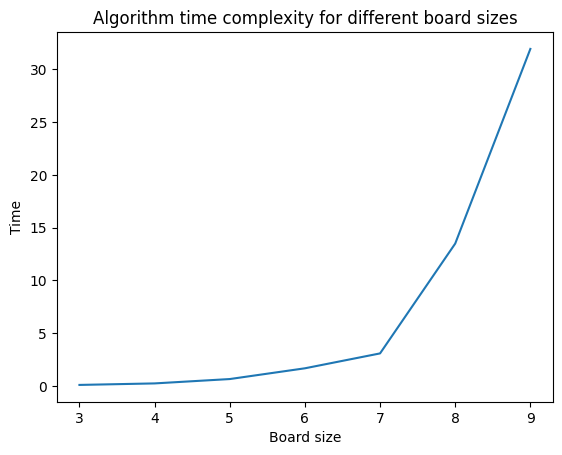

In [ ]:
# Plot of the time increase with increase in board size
import matplotlib.pyplot as plt
print(size_time)
plt.plot(list(size_time.keys()), list(size_time.values()))
plt.xlabel('Board size')
plt.ylabel('Time')
plt.title('Algorithm time complexity for different board sizes')
plt.show()